In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
rootdir = os.path.join(os.getcwd(), "..")

In [2]:
search_space = "4796"
training_protocol ="joint"

In [3]:
results = pd.read_csv(os.path.join(rootdir, "collected", "tuning", f"{search_space}-{training_protocol}.csv"), index_col=0).transpose()

In [4]:
results["seeds"] = list(map(lambda x: int(x.replace("seed-","")), results.index.tolist()))

In [5]:
results.shape

(99, 7)

In [6]:
# best_seed = results["val_loss"].idxmin()
# results.loc[best_seed]
results.sort_values(by="val_loss")

,loss,log_var,mse,val_loss,val_log_var,val_mse,seeds
seed-45,-0.211378,-2.302561,0.004191,-0.204898,-2.302568,0.005489,45
seed-16,-0.207079,-2.302464,0.005043,-0.201922,-2.302536,0.006082,16
seed-89,-0.182399,-2.302116,0.009954,-0.183931,-2.302564,0.009683,89
seed-43,-0.159625,-2.301203,0.014426,-0.175179,-2.302469,0.011426,43
seed-60,-0.149815,-2.301086,0.016478,-0.170630,-2.302574,0.012346,60
...,...,...,...,...,...,...,...
seed-12,0.667852,-1.370469,0.214956,0.475160,-1.635977,0.146678,12
seed-86,0.783552,-1.072246,0.260697,0.478548,-1.179982,0.091976,86
seed-52,0.673244,-0.995518,0.188748,0.518087,-1.080334,0.093640,52
seed-66,0.819912,-0.626861,0.236058,0.655630,-0.716737,0.092661,66


# Visualize Different metrics

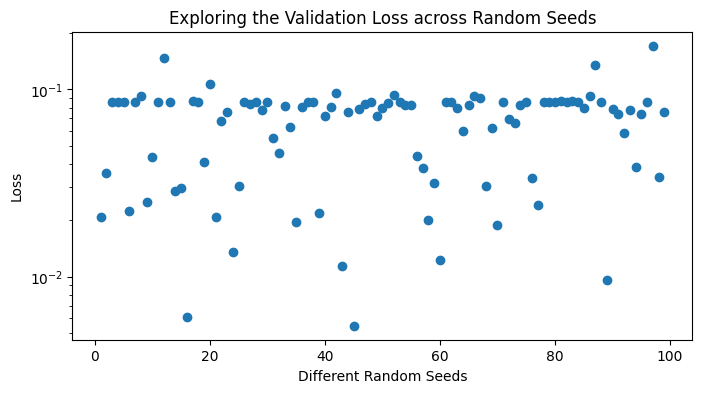

In [7]:
fig, axs = plt.subplots(figsize=(8, 4))
_ = axs.scatter(results["seeds"].values, results["val_mse"].values)
_ = axs.set_xlabel("Different Random Seeds")
_ = axs.set_ylabel("Loss")
_ = axs.set_title(f"Exploring the Validation Loss across Random Seeds")
# _ = axs.set_ylim([0., 0.5])
_ = axs.set_yscale("log")